In [9]:
import skimage

In [10]:
import dlib

In [11]:
import cv2

In [12]:
from skimage import io

In [37]:
import numpy as np

In [54]:
import matplotlib.pyplot as plt

In [13]:
three_faces=io.imread(r"C:\Users\DELL\AppData\Local\Programs\Python\Python36\Lib\selfmade\dlib\three_faces.jpg")

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


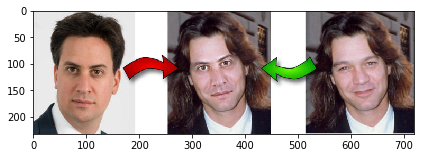

In [14]:
io.imshow(three_faces)

In [16]:
three_faces.shape

(233, 720, 3)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


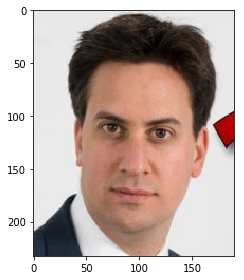

In [20]:
face_in=three_faces[:,:190,:]
io.imshow(face_in)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


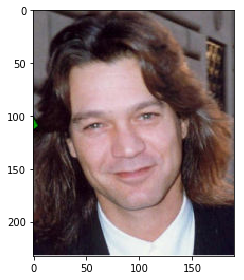

In [21]:
face_out=three_faces[:,720-190:,:]
io.imshow(face_out)

In [25]:
io.imsave(r"C:\Users\DELL\AppData\Local\Programs\Python\Python36\Lib\selfmade\dlib\face_in.jpg",face_in)
io.imsave(r"C:\Users\DELL\AppData\Local\Programs\Python\Python36\Lib\selfmade\dlib\face_out.jpg",face_out)

In [34]:
PREDICTOR_PATH = "C:/Users/DELL/AppData/Local/Programs/Python/Python36/Lib/selfmade/dlib/shape_predictor_68_face_landmarks.dat"

In [35]:
detector = dlib.get_frontal_face_detector()

In [36]:
predictor = dlib.shape_predictor(PREDICTOR_PATH)

In [45]:
def get_landmarks(im):
    rects=detector(im,1)
    
    if len(rects)>1:
        raise tomanyfaces
    if len(rects)==0:
        raise nofaces
        
    return np.matrix([[p.x,p.y] for p in predictor(im,rects[0]).parts()])
    

In [51]:
marks_in=get_landmarks(face_in)
marks_out=get_landmarks(face_out)

In [113]:
list_in_x=marks_in.T[0].tolist()[0]
list_in_y=marks_in.T[1].tolist()[0]

In [167]:
def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.2,
                    color=(0, 0, 255))
        cv2.circle(im, pos, 1, color=(0, 255, 255))
    return im

In [168]:
face_in_marks=annotate_landmarks(face_in,marks_in)

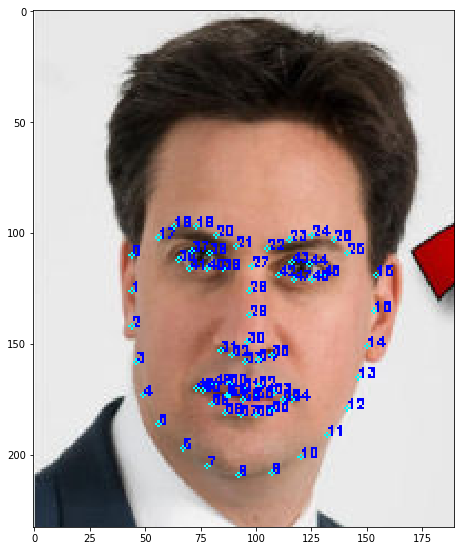

In [169]:
plt.figure("img",figsize=(233/20,190/20))
plt.imshow(face_in_marks)